In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from WindPy import w
%matplotlib inline

In [2]:
w.start()

Welcome to use Wind Quant API for Python (WindPy)!

COPYRIGHT (C) 2017 WIND INFORMATION CO., LTD. ALL RIGHTS RESERVED.
IN NO CIRCUMSTANCE SHALL WIND BE RESPONSIBLE FOR ANY DAMAGES OR LOSSES CAUSED BY USING WIND QUANT API FOR Python.


.ErrorCode=0
.Data=[OK!]

## 获取起始日期

In [3]:
today = datetime.datetime.today()

In [4]:
today.strftime('%Y-%m-%d')

'2019-04-08'

In [5]:
start_date = today - datetime.timedelta(365) # 最近1年

In [6]:
start_date.strftime('%Y-%m-%d')

'2018-04-08'

## 获取数据

In [7]:
df = pd.read_excel(u'../data/资产与宏观变量.xlsx')

In [8]:
df

,Variables,Name,Assets
0,USDCNH.FX,美元兑人民币,000300.SH
1,S0059749,10Y国债收益率,000905.SH
2,M0017142,3M SHIBOR,881001.WI
3,S0059766,AA级企业债收益率,CBA00602.CS
4,G1122652,股票波动率,CBA02002.CS
5,SPX.GI,标普500,AU9999.SGE
6,G0000891,10Y美债收益率,HSI.HI
7,G8324466,A股市盈率,NaN


In [9]:
var2name = {k: v for k, v in zip(df['Variables'], df['Name'])}

In [10]:
data = w.wsd(df['Assets'].tolist()[:7], 'close', start_date, today)

In [11]:
price = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=data.Codes)

In [12]:
price.head()

,000300.SH,000905.SH,881001.WI,CBA00602.CS,CBA02002.CS,AU9999.SGE,HSI.HI
2018-04-09,3852.9292,6025.6493,4329.9234,114.2462,78.2010,271.50,30229.58
2018-04-10,3927.1729,6063.7423,4377.5354,114.2404,78.2482,271.97,30728.74
2018-04-11,3938.3434,6086.6126,4396.2282,114.2910,78.2550,272.90,30897.71
2018-04-12,3898.6354,6051.3346,4362.5282,114.3498,78.2853,274.08,30831.28
2018-04-13,3871.1443,6027.1867,4341.2102,114.4434,78.3028,272.10,30808.38


In [13]:
price.tail()

,000300.SH,000905.SH,881001.WI,CBA00602.CS,CBA02002.CS,AU9999.SGE,HSI.HI
2019-04-01,3973.9280,5757.8379,4375.6531,118.4474,79.8626,282.00,29562.02
2019-04-02,3971.2852,5775.5497,4385.7786,118.3174,79.7864,281.51,29624.67
2019-04-03,4022.1566,5836.0369,4436.8796,117.8793,79.7436,282.05,29986.39
2019-04-04,4062.2309,5871.5575,4470.6075,117.7296,79.6849,282.71,29936.32
2019-04-08,4062.2309,5871.5575,4470.6075,117.7296,79.6849,282.71,29936.32


In [14]:
market_variables = [x for x in df['Variables'] if str(x).find('.') != -1]
economic_variables = [x for x in df['Variables'] if str(x).find('.') == -1 and str(x) != 'nan']

In [15]:
market_variables

[u'USDCNH.FX', u'SPX.GI']

In [16]:
economic_variables

[u'S0059749', u'M0017142', u'S0059766', u'G1122652', u'G0000891', u'G8324466']

In [17]:
data = w.wsd(market_variables, 'close', start_date, today)

In [18]:
market_df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[var2name[x] for x in market_variables])

In [19]:
market_df.tail()

,美元兑人民币,标普500
2019-04-01,6.7191,2867.19
2019-04-02,6.7257,2867.24
2019-04-03,6.7149,2873.40
2019-04-04,6.7164,2879.39
2019-04-08,6.7110,2892.74


In [20]:
market_nav = (1+market_df.pct_change()).cumprod()

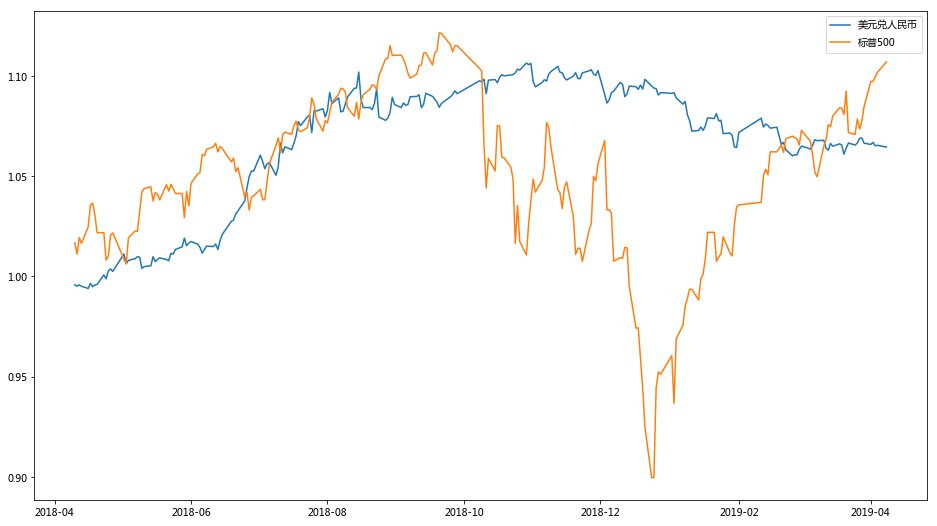

In [21]:
market_nav.plot(figsize=(16, 9))

In [22]:
data = w.edb(economic_variables, start_date, today)

In [23]:
economic_df = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=[var2name[x] for x in economic_variables])

In [24]:
economic_df.head()

,10Y国债收益率,3M SHIBOR,AA级企业债收益率,股票波动率,10Y美债收益率,A股市盈率
2018-04-08,3.7008,4.2781,5.8314,NaN,NaN,NaN
2018-04-09,3.6959,4.2579,5.8117,27.07,2.78,17.58
2018-04-10,3.7159,4.2290,5.8277,26.44,2.80,17.88
2018-04-11,3.7109,4.2090,5.8286,25.79,2.79,17.98
2018-04-12,3.7109,4.1990,5.8148,24.87,2.83,17.83


In [25]:
economic_df[u'信用利差'] = economic_df[u'AA级企业债收益率'] - economic_df[u'10Y国债收益率']

In [26]:
del economic_df[u'AA级企业债收益率']

In [27]:
economic_nav = (1 + economic_df.pct_change()).cumprod().fillna(method='ffill')

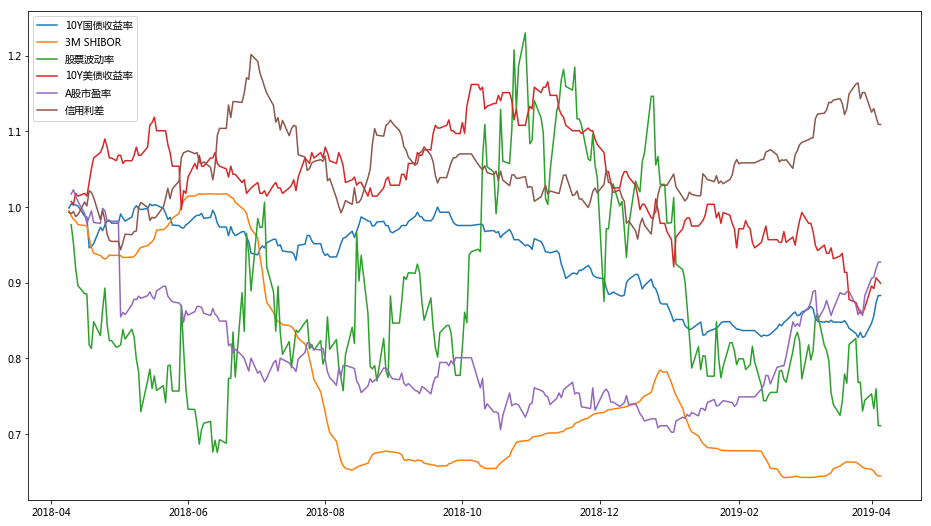

In [28]:
economic_nav.plot(figsize=(16, 9))

In [29]:
variable_df = market_nav.join(economic_nav)

In [30]:
variable_df.iloc[0] = 1

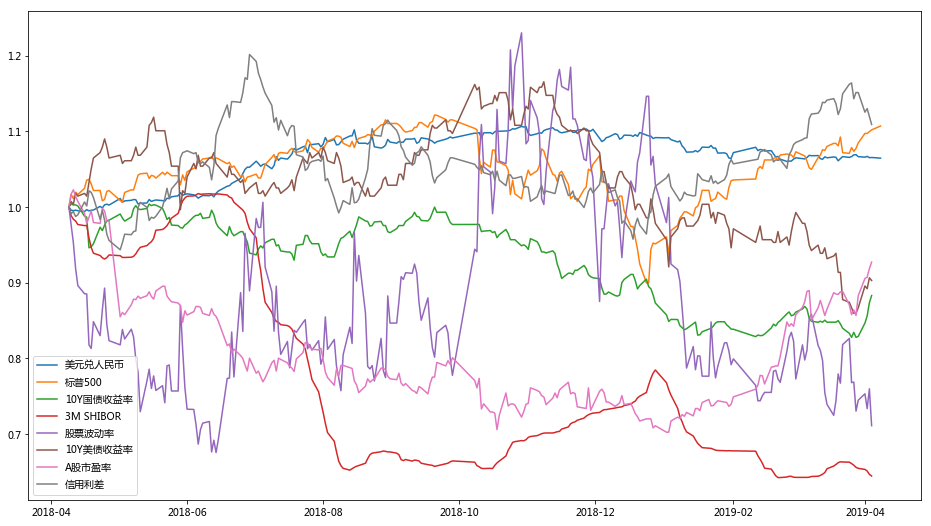

In [31]:
variable_df.plot(figsize=(16, 9))

In [32]:
variable_df.to_excel('../data/variables.xlsx')

## 初始化表格

In [33]:
ret_df = pd.DataFrame()

In [34]:
ret_df[u'成长股'] = price['000905.SH'].pct_change()
ret_df[u'价值股'] = price['000300.SH'].pct_change()
ret_df[u'港股'] = price['HSI.HI'].pct_change()
ret_df[u'黄金'] = price['AU9999.SGE'].pct_change()
ret_df[u'国债'] = price['CBA00602.CS'].pct_change()
ret_df[u'信用债'] = price['CBA02002.CS'].pct_change()

In [35]:
nav = (1 + ret_df).cumprod()

In [36]:
nav.iloc[0] = 1

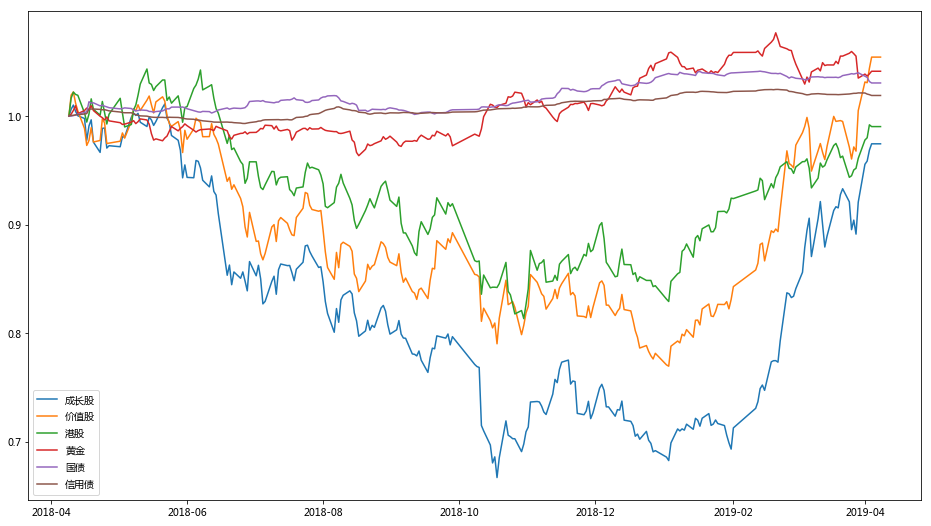

In [37]:
nav.plot(figsize=(16, 9))

In [38]:
nav.to_excel(u'../data/nav.xlsx')

## 生成EWMA相关性矩阵

In [39]:
cor_df = pd.DataFrame(index= ret_df.columns, 
                      columns=market_df.columns.tolist() + economic_df.columns.tolist())

In [40]:
for asset in cor_df.index:
    for var in cor_df.columns:
        if var in market_df.columns:
            s, t = (1+ret_df[asset]).cumprod(), (1+market_df[var].pct_change()).cumprod()
            corr = s.ewm(alpha=0.02, ignore_na=True, adjust=True).corr(t)
            cor_df.loc[asset, var] = corr[-1]
        elif var in economic_df.columns:
            s, t = (1+ret_df[asset]).cumprod(), (1+economic_df[var].pct_change()).cumprod()
            corr = s.ewm(alpha=0.02, ignore_na=True, adjust=True).corr(t)
            cor_df.loc[asset, var] = corr[-1]

In [41]:
cor_df

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
成长股,-0.671796,0.72953,-0.186311,-0.273572,-0.579381,-0.598521,0.976175,0.820877
价值股,-0.699708,0.764754,-0.27612,-0.398228,-0.633841,-0.621495,0.991955,0.821963
港股,-0.851356,0.738874,-0.357339,-0.324369,-0.825012,-0.642628,0.888645,0.757035
黄金,-0.379734,-0.0701563,-0.889625,-0.41165,-0.460671,-0.707598,0.224521,0.299538
国债,-0.32332,-0.150201,-0.984009,-0.380989,-0.480963,-0.743952,0.186458,0.278237
信用债,-0.311699,-0.0195785,-0.937118,-0.577621,-0.491963,-0.678407,0.223641,0.25063


In [42]:
cor_df.to_excel(u'../data/ewma_cor.xlsx')

In [43]:
# cor_df[cor_df.abs() < 0.1] = 0

In [44]:
cor_df

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
成长股,-0.671796,0.72953,-0.186311,-0.273572,-0.579381,-0.598521,0.976175,0.820877
价值股,-0.699708,0.764754,-0.27612,-0.398228,-0.633841,-0.621495,0.991955,0.821963
港股,-0.851356,0.738874,-0.357339,-0.324369,-0.825012,-0.642628,0.888645,0.757035
黄金,-0.379734,-0.0701563,-0.889625,-0.41165,-0.460671,-0.707598,0.224521,0.299538
国债,-0.32332,-0.150201,-0.984009,-0.380989,-0.480963,-0.743952,0.186458,0.278237
信用债,-0.311699,-0.0195785,-0.937118,-0.577621,-0.491963,-0.678407,0.223641,0.25063


## 计算变量的trend

In [45]:
trend = {}
for var in cor_df.columns:
    if var in market_df.columns:
        t = market_df[var]
    elif var in economic_df.columns:
        t = economic_df[var]
    ret = t.pct_change()[-60:]
    up, down = ret[ret > 0].sum(), -ret[ret < 0].sum()
    if up > down:
        trend[var] = up / down
    else:
        trend[var] = -down / up

In [46]:
for k, v in trend.iteritems():
    print k, v

标普500 2.506157836518138
股票波动率 -1.092836440065631
3M SHIBOR -3.0601000467610646
美元兑人民币 -1.4375965093418894
信用利差 1.6802806460810458
10Y国债收益率 1.3587544354523136
A股市盈率 2.467877250743614
10Y美债收益率 -1.3002675494284548


# 综合得到Score Board

In [47]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [48]:
board = pd.DataFrame(index=cor_df.index, columns=cor_df.columns)
for var in cor_df.columns:
    x = cor_df[var] * trend[var]
    board[var] = sigmoid(x.astype(np.float32))

In [49]:
trend_df = pd.DataFrame(trend, index=[u'变量趋势'])

In [50]:
board = trend_df.append(board)

In [51]:
board = board[cor_df.columns]

In [52]:
board

,美元兑人民币,标普500,10Y国债收益率,3M SHIBOR,股票波动率,10Y美债收益率,A股市盈率,信用利差
变量趋势,-1.437597,2.506158,1.358754,-3.060100,-1.092836,-1.300268,2.467877,1.680281
成长股,0.724276,0.861561,0.437048,0.697866,0.653208,0.685300,0.917517,0.798879
价值股,0.732217,0.871758,0.407290,0.771820,0.666564,0.691707,0.920417,0.799172
港股,0.772750,0.864331,0.380946,0.729601,0.711279,0.697535,0.899625,0.781090
黄金,0.633185,0.456157,0.229917,0.778973,0.623267,0.715056,0.635084,0.623236
国债,0.614153,0.406989,0.207999,0.762397,0.628459,0.724588,0.613051,0.614796
信用债,0.610187,0.487736,0.218691,0.854156,0.631262,0.707259,0.634581,0.603753


In [53]:
board.to_excel(u'../data/dashboard.xlsx')